### What is NLP(Natural Language Processing)?
Natural language processing (NLP) refers to the branch of computer science—and more specifically, the branch of `artificial intelligence or AI—concerned` with giving computers the ability to understand text and spoken words in much the same way human beings can.


### Applications
* Chat bot
* Translation
* Sentiment Analysis

# Twitter Sentiment Analysis (🙂 - 😔)

In [2]:
# Import some basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import the dataset

`df = pd.read_csv("dataset/dataset.csv")` <br>
The given data is not formated in 'utf-8' codec <br>
So I have Saved the csv file in UTF-8 codec 

In [3]:
df = pd.read_csv('dataset/dataset-UTF-8.csv')
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [4]:
# Now remove ItemID column
df.drop(["ItemID"],inplace = True,axis = 1)
df.head()

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


## EDA

In [5]:
df.shape

(99989, 2)

In [6]:
df.isnull().count()
# There isn't any null value

Sentiment        99989
SentimentText    99989
dtype: int64

In [7]:
df.Sentiment.value_counts()

1    56457
0    43532
Name: Sentiment, dtype: int64

### 😔 - 🙂
* 0:Indicates the Sad 😔
* 1:Indicates the Happy 🙂

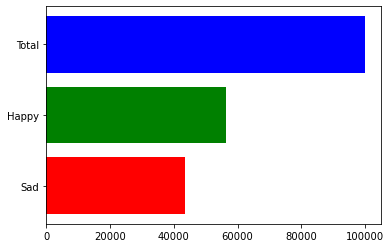

In [8]:
num_of_data = df.shape[0]
num_of_sad_data = df.Sentiment.value_counts()[0]
num_of_happy_data = df.Sentiment.value_counts()[1]

fig,ax = plt.subplots()
ax.barh(["Sad","Happy","Total"],[num_of_sad_data,num_of_happy_data,num_of_data],color = ["r","g","b"])
plt.show()

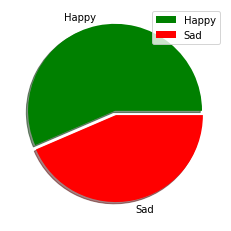

In [9]:
fig,ax = plt.subplots()
ax.pie([num_of_happy_data,num_of_sad_data], 
       labels = ["Happy","Sad"],
       colors = ['g','r'],
       shadow = True,
       explode = [0.05,0])
ax.legend()
plt.show()

### Tokenization

* Tokenization is the process, During that process Paragraph will be converted to Sentenses and sentenses to word

In [10]:
import nltk

In [11]:
dummy_text = "Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum."

In [12]:
# sent_tokenize convert the Paragraph to sentences
sentences = nltk.sent_tokenize(dummy_text)
sentences

['Lorem Ipsum is simply dummy text of the printing and typesetting industry.',
 "Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book.",
 'It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged.',
 'It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.']

In [13]:
# word_tokenize convert the setences to word
words = nltk.word_tokenize(dummy_text)
words[:10]

['Lorem',
 'Ipsum',
 'is',
 'simply',
 'dummy',
 'text',
 'of',
 'the',
 'printing',
 'and']

## Stemming

* stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root

eg. eating - eat

In [14]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [15]:
stemmer = PorterStemmer()

In [16]:
stemmedSentence = ""
for word in nltk.word_tokenize(sentences[0]):
    stemmedSentence += stemmer.stem(word)+ " "

In [17]:
print("Original : ",sentences[0])
print("Stemmed: ", stemmedSentence)

Original :  Lorem Ipsum is simply dummy text of the printing and typesetting industry.
Stemmed:  lorem ipsum is simpli dummi text of the print and typeset industri . 


### Remove stop words

* Stop words are basically a set of commonly used words in any language, not just English.
* eg. He, She, It, of.....
* This words are not usefull for sentiment analysis

In [18]:
nltk.download('stopwords')
no_stop = ""
for word in nltk.word_tokenize(sentences[0]):
    if word not in stopwords.words('english'):
        word = stemmer.stem(word)
        no_stop += word + " "

[nltk_data] Downloading package stopwords to /Users/dhanu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
print("Original : ",sentences[0])
print("Stemmed: ", stemmedSentence)
print("No stop: ", no_stop)

Original :  Lorem Ipsum is simply dummy text of the printing and typesetting industry.
Stemmed:  lorem ipsum is simpli dummi text of the print and typeset industri . 
No stop:  lorem ipsum simpli dummi text print typeset industri . 


## Bag of Words (BoW)

- let's take an examples that can help to understand

 sentense 1 : This is a demo sentence <br>
 sentense 2 : This is a dummy sentence<br>
 | - |  demo | dummy | sentence |
 |---|---|---|---|
 | sentence 1 | 1 | 0 | 1|
 | sentence 2 | 0 | 1 | 1|
 
* here 'this', 'is', 'a'.... these three words are not important

In [20]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

In [21]:
ps = PorterStemmer()
wordnet=WordNetLemmatizer()

In [22]:
sentences = nltk.sent_tokenize(dummy_text)
corpus = []

In [23]:
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [24]:
corpus[:2]

['lorem ipsum simpli dummi text print typeset industri',
 'lorem ipsum industri standard dummi text ever sinc unknown printer took galley type scrambl make type specimen book']

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
pd.DataFrame(data = X)

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,0,1,0,0,1,...,1,1,0,1,1,2,0,0,1,0
2,0,1,0,1,0,0,0,1,1,0,...,0,0,1,0,0,0,1,1,0,0
3,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## TF-IDF

* TF( Term Frequency) = `(no of rep of words in sentence) / (no of words in sentence)`

     let's take an examples that can help to understand

 sentence 1 : This is a demo sentence <br>
 sentence 2 : This is a dummy sentence<br>
 sentence 3 : This is a dummy demo sentence 
 | - |  demo | dummy | sentence |
 |---|---|---|---|
 | sentence 1 | 1/2 | 0 | 1/2|
 | sentence 2 | 0 | 1/2 | 1/2|
 | sentence 3 | 1/3 | 1/3 | 1/3 |
 
* IDF (Inverse Document Frequency) = `log((no of sentences)/(no of sentences which contain word))`

| demo | dummy | sentence |
| --- | --- | --- |
| log(3/2) | log(3/2) | log(3/3) = 0 |

    now, multiply the above values to TF data
    
 | - |  demo | dummy | sentence |
 |---|---|---|---|
 | sentence 1 | 1/2 * log(3/2) | 0 | 1/2 * log(3/3) = `0`|
 | sentence 2 | 0 | 1/2 | 1/2|
 | sentence 3 | 1/3 * log(3/2)| 1/3 * log(3/2) | 1/3 * log(3/3) = `0` |

## Cleaning and Preprocessing The Data

In [26]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/dhanu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
df.reset_index()
df.head()

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


In [28]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['SentimentText'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [29]:
corpus[:5]

['sad apl friend',
 'miss new moon trailer',
 'omg alreadi',
 'omgaga im sooo im gunna cri dentist sinc supos get crown put min',
 'think mi bf cheat']

In [30]:
df.SentimentText[:5]

0                         is so sad for my APL frie...
1                       I missed the New Moon trail...
2                              omg its already 7:30 :O
3              .. Omgaga. Im sooo  im gunna CRy. I'...
4             i think mi bf is cheating on me!!!   ...
Name: SentimentText, dtype: object

### Creating Bag of Words model

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3500)
X = cv.fit_transform(corpus).toarray()

In [32]:
y = df.iloc[:,0].values

In [33]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [34]:
from sklearn.naive_bayes import MultinomialNB
MultinominalModel = MultinomialNB().fit(X_train, y_train)

In [35]:
y_pred=MultinominalModel.predict(X_test)

In [36]:
print(MultinominalModel.score(X_train,y_train))
print(MultinominalModel.score(X_test,y_test))

0.7561600680076509
0.740974097409741


In [37]:
# Predict
MultinominalModel.predict(cv.transform(["I'am very very happy"]).toarray())

array([1])

### SCALING

In [38]:
from sklearn import preprocessing

In [39]:
pre = np.array([1,2,3,4,5,6,7,8,9,10])
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit_transform(pre.reshape(-1, 1))

array([[0.        ],
       [0.11111111],
       [0.22222222],
       [0.33333333],
       [0.44444444],
       [0.55555556],
       [0.66666667],
       [0.77777778],
       [0.88888889],
       [1.        ]])

In [40]:
X_train_scaled = min_max_scaler.fit_transform(X_train)

### Train Using ANN

In [41]:
import keras

Using TensorFlow backend.


In [42]:
X_train_scaled.shape

(79991, 3500)

In [43]:
model = keras.Sequential([
    keras.layers.Dense(2000,input_shape = (3500,),activation= "relu"),
    keras.layers.Dense(1000,activation = "relu"),
    keras.layers.Dense(100 ,activation = "relu"),
    keras.layers.Dense(2,activation = "sigmoid")
])

2022-01-21 22:16:42.114108: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-21 22:16:42.115292: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [44]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [45]:
model.fit(X_train_scaled,y_train,batch_size =7900 ,epochs =10)

Epoch 1/10
79991/79991 [==============================] - 55s 686us/step - loss: 0.6673 - accuracy: 0.5692
Epoch 2/10
79991/79991 [==============================] - 56s 700us/step - loss: 0.5489 - accuracy: 0.7363
Epoch 3/10
79991/79991 [==============================] - 55s 690us/step - loss: 0.4714 - accuracy: 0.7773
Epoch 4/10
79991/79991 [==============================] - 58s 731us/step - loss: 0.4348 - accuracy: 0.7972
Epoch 5/10
79991/79991 [==============================] - 57s 709us/step - loss: 0.3831 - accuracy: 0.8269
Epoch 6/10
79991/79991 [==============================] - 51s 643us/step - loss: 0.3069 - accuracy: 0.8696
Epoch 7/10
79991/79991 [==============================] - 50s 620us/step - loss: 0.2318 - accuracy: 0.9058
Epoch 8/10
79991/79991 [==============================] - 48s 606us/step - loss: 0.1692 - accuracy: 0.9326
Epoch 9/10
79991/79991 [==============================] - 46s 575us/step - loss: 0.1305 - accuracy: 0.9479
Epoch 10/10
79991/79991 [============

In [46]:
model1 = keras.Sequential([
    keras.layers.Dense(2000,input_shape = (3500,),activation= "relu"),
    keras.layers.Dense(1000,activation = "relu"),
    keras.layers.Dense(100 ,activation = "relu"),
    keras.layers.Dense(2,activation = "sigmoid")
])
model1.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model1.fit(X_train,y_train,batch_size =7900 ,epochs =10)

Epoch 1/10
79991/79991 [==============================] - 48s 594us/step - loss: 0.6492 - accuracy: 0.5938
Epoch 2/10
79991/79991 [==============================] - 48s 605us/step - loss: 0.5236 - accuracy: 0.7521
Epoch 3/10
79991/79991 [==============================] - 48s 601us/step - loss: 0.4617 - accuracy: 0.7834
Epoch 4/10
79991/79991 [==============================] - 45s 567us/step - loss: 0.4119 - accuracy: 0.8123
Epoch 5/10
79991/79991 [==============================] - 49s 613us/step - loss: 0.3384 - accuracy: 0.8532
Epoch 6/10
79991/79991 [==============================] - 49s 618us/step - loss: 0.2396 - accuracy: 0.9045
Epoch 7/10
79991/79991 [==============================] - 49s 616us/step - loss: 0.1704 - accuracy: 0.9335
Epoch 8/10
79991/79991 [==============================] - 47s 584us/step - loss: 0.1212 - accuracy: 0.9527
Epoch 9/10
79991/79991 [==============================] - 50s 627us/step - loss: 0.0941 - accuracy: 0.9620
Epoch 10/10
79991/79991 [============

In [47]:
y_predicted_model1 = model1.predict(X_test)
y_predicted_model1_label = [np.argmax(i) for i in y_predicted_model1]

In [48]:
y_predicted_model1_label[0]

0

## Heatmap

### Model-1 (ANN model)

Text(33.0, 0.5, 'Original')

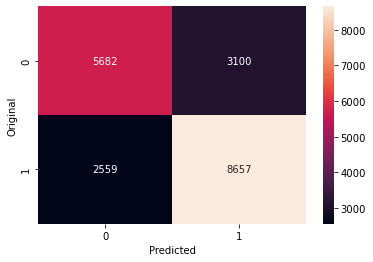

In [49]:
import tensorflow as tf
cm_1 = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_model1_label)

import seaborn as sns
sns.heatmap(cm_1,annot = True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Original")

### Model-2 (ANN model)

Text(33.0, 0.5, 'Original')

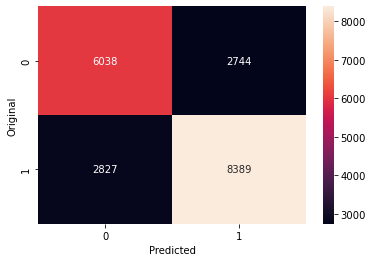

In [50]:
y_predicted_model2 = model.predict(X_test)
y_predicted_model2_label = [np.argmax(i) for i in y_predicted_model2]

import tensorflow as tf
cm_2 = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_model2_label)

import seaborn as sns
sns.heatmap(cm_2,annot = True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Original")

### Model-3 (MultinominalModel)

Text(33.0, 0.5, 'Original')

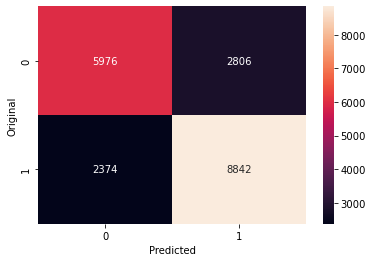

In [51]:
y_predicted_model3 = MultinominalModel.predict(X_test)
# y_predicted_model3_label = [np.argmax(i) for i in y_predicted_model3]

import tensorflow as tf
cm_3 = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_model3)

import seaborn as sns
sns.heatmap(cm_3,annot = True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Original")